In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from v2.research.scripts.scoreboard import updateScoreboard
from sklearn.model_selection import train_test_split

from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import confusion_matrix

/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "eliptic_envelope_test"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('moh', 'time', ''), ('tod', 'time', ''), ('dow', 'time', ''), ('bop', 'close', ''),('optimal_v2', 'close', '')],
                            param_spec={},
                            optimal_threshold={'buy':(0.005, 0.03)},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [10,30,60]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2,3,5,10,30]},
                                    {'indicator_name':'natr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [30,60,120,180]},
                                    {'indicator_name':'cmo',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2,3,5,10,60]}
                                    ],
                            scale='minmaxwindow')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi

Loading data from XRP...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from ZEC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from MATIC...
Loading data from chunk 0...
Loading data from NEO...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from BAT...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from ETC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from BTC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from ZRX...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data fr

In [4]:
dataset.drop(["time", "open", "high", "low", "volume"], axis=1, inplace=True)
dataset.dropna(inplace=True)
dataset

,close,MOH,TOD,DOW,BOP,optimal,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_10,CCI_close_period_30,...,RSI_close_period_30,NATR_close_period_30,NATR_close_period_60,NATR_close_period_120,NATR_close_period_180,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
15179,0.741253,0,0,0,0.056180,0.0,0.208498,0.129967,0.384692,0.414015,...,0.535588,0.240741,0.225134,0.211927,0.196567,0.010292,0.061289,0.153532,0.283261,0.674852
15180,0.741867,0,0,0,0.981884,0.0,0.338881,0.200515,0.447328,0.431680,...,0.560247,0.236549,0.222998,0.210651,0.195596,0.743951,0.547571,0.401661,0.377682,0.689267
15181,0.739973,0,0,0,0.012821,0.0,0.306930,0.174313,0.113392,0.371827,...,0.487597,0.246469,0.230035,0.215153,0.198675,0.133422,0.161119,0.188161,0.258882,0.637101
15182,0.739982,0,0,0,0.704545,0.0,0.498895,0.270965,0.224781,0.368076,...,0.487941,0.255728,0.236315,0.218752,0.200847,0.139653,0.165020,0.190533,0.260019,0.637302
15183,0.739991,0,0,0,0.501761,0.0,0.504688,0.272559,0.302125,0.368341,...,0.488331,0.258878,0.238935,0.220337,0.201775,0.153033,0.171368,0.193767,0.261402,0.637527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372817,0.059959,1,0,0,0.500000,0.0,0.091004,0.259828,0.378649,0.477608,...,0.389229,0.091818,0.125703,0.180703,0.237196,0.002875,0.025916,0.127869,0.305099,0.390757
11372818,0.058844,0,0,0,0.068093,0.0,0.457378,0.433606,0.001008,0.258179,...,0.139151,0.245332,0.242605,0.270557,0.315541,0.000052,0.001132,0.011458,0.054660,0.162739
11372819,0.058782,0,0,0,0.883978,0.0,0.567264,0.552267,0.164723,0.224192,...,0.133080,0.353806,0.325913,0.333260,0.368422,0.000046,0.001048,0.010774,0.051906,0.154881
11372820,0.057441,0,0,0,0.245223,0.0,0.382907,0.353188,0.206150,0.234186,...,0.056168,0.529282,0.463105,0.440251,0.462293,0.000009,0.000309,0.004128,0.022690,0.039521


In [5]:
X = dataset.iloc[:int(len(dataset)*0.8)]
y = dataset.iloc[-int(len(dataset)*0.2):]
y

,close,MOH,TOD,DOW,BOP,optimal,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_10,CCI_close_period_30,...,RSI_close_period_30,NATR_close_period_30,NATR_close_period_60,NATR_close_period_120,NATR_close_period_180,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
9092186,23.692974,0,0,0,0.500000,0.0,0.904387,0.907037,0.680630,0.706177,...,0.816484,0.123567,0.131565,0.149070,0.175679,0.999368,0.992085,0.958553,0.878164,0.794552
9092187,23.704987,0,0,0,0.681347,0.0,0.868161,0.889395,0.679164,0.716383,...,0.830594,0.124685,0.132570,0.149474,0.175771,0.999626,0.994175,0.965946,0.892735,0.806136
9092188,23.716194,0,0,0,0.560647,0.0,0.831673,0.857047,0.663385,0.705406,...,0.843039,0.127607,0.134845,0.150731,0.176501,0.999788,0.995759,0.971965,0.905051,0.816595
9092189,23.710397,0,0,0,0.221402,0.0,0.797816,0.829451,0.615158,0.663577,...,0.822995,0.127189,0.134908,0.150673,0.176370,0.691040,0.824671,0.879570,0.858204,0.804605
9092190,23.720198,0,0,0,1.000000,0.0,0.819937,0.876113,0.607887,0.651603,...,0.834244,0.127236,0.135208,0.150653,0.176167,0.848870,0.877916,0.900216,0.872745,0.813789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372817,0.059959,1,0,0,0.500000,0.0,0.091004,0.259828,0.378649,0.477608,...,0.389229,0.091818,0.125703,0.180703,0.237196,0.002875,0.025916,0.127869,0.305099,0.390757
11372818,0.058844,0,0,0,0.068093,0.0,0.457378,0.433606,0.001008,0.258179,...,0.139151,0.245332,0.242605,0.270557,0.315541,0.000052,0.001132,0.011458,0.054660,0.162739
11372819,0.058782,0,0,0,0.883978,0.0,0.567264,0.552267,0.164723,0.224192,...,0.133080,0.353806,0.325913,0.333260,0.368422,0.000046,0.001048,0.010774,0.051906,0.154881
11372820,0.057441,0,0,0,0.245223,0.0,0.382907,0.353188,0.206150,0.234186,...,0.056168,0.529282,0.463105,0.440251,0.462293,0.000009,0.000309,0.004128,0.022690,0.039521


In [6]:
contamination_val = (len(X[X['optimal'] > 0.005]) / len(X))*3/2
contamination_val

0.01957412152682791

In [7]:
clf = EllipticEnvelope(contamination=contamination_val, random_state=69420).fit(X)

In [8]:
preds = clf.predict(y)

In [12]:
graphing = y[['close']]
graphing['classify'] = preds
graphing['close']
graphing['classify'].unique()

array([ 1, -1])

In [32]:
smaller_graphing = graphing[690000:700000]
print(np.unique(smaller_graphing['classify']))
smaller_graphing.reset_index(inplace=True)
smaller_graphing['classify'].unique()
copy_smaller_graphing = smaller_graphing.copy()

[-1  1]


<Figure size 432x288 with 0 Axes>

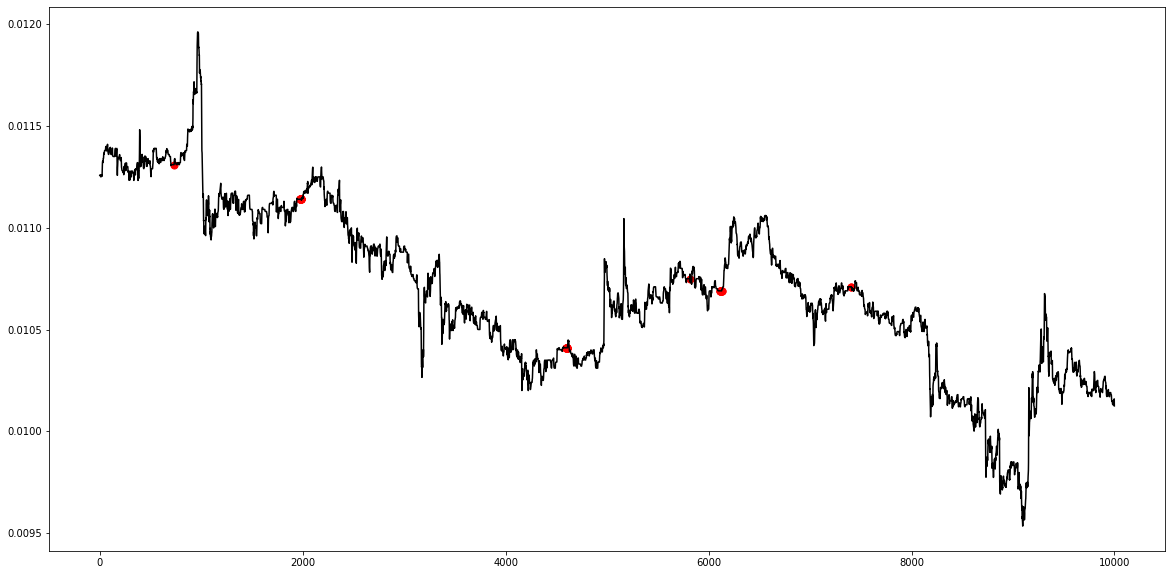

In [33]:
nu.graphPoints(copy_smaller_graphing, mode="buy", plot_optimal=False, plot_sma=False, fields=[], value_match=-1)